In [38]:
%run dataset.py
%matplotlib inline

from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import numpy as np
from PIL import ImageStat
import matplotlib.pyplot as plt
import random

In [39]:
'''
dataset = CXRDataset('dataset', dataset_type='train')

mean = np.zeros(3)
for i in range(len(dataset)):
    image = dataset[i][0]
    stat = ImageStat.Stat(image)
    mean += np.array(stat.mean)
    print('\r{:.2f}%'.format(100*i/len(dataset)), end='\r')
mean /= len(dataset)*255
print(mean) # 0.50576189
'''
print(0.50576189)

0.50576189


In [40]:
def show_tensor_image(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.50576189, 0.50576189, 0.50576189])
    inp = inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

In [41]:
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.50576189, 0.50576189, 0.50576189], [1., 1., 1.])
])
dataset = CXRDataset('dataset', dataset_type='train', transform=trans)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True, num_workers=4)
images, labels, names, bboxes, bbox_valids = next(iter(dataloader))
label_string = []
for label in labels:
    t = ''
    for i, d in enumerate(label):
        if d == 1: t += dataset.classes[i]+'|'
    if t == '': t = 'no finding'
    else: t = t[:-1]
    label_string.append(t)

name: 00000034_001.png


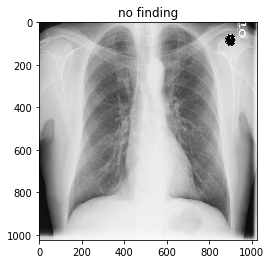

In [42]:
show_tensor_image(images[0], title=label_string[0])
print('name: '+names[0])

name: 00001974_000.png


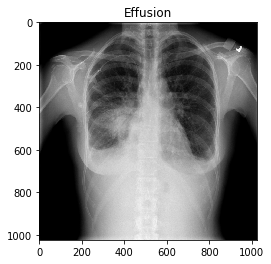

In [43]:
show_tensor_image(images[1], title=label_string[1])
print('name: '+names[1])

In [44]:
print(images.shape)
print(labels.shape)

torch.Size([2, 1, 1024, 1024])
torch.Size([2, 8])


In [45]:
print(images)
print(labels)
print(names)

tensor([[[[-0.4234, -0.4234, -0.4234,  ...,  0.1217,  0.1844,  0.2472],
          [-0.4234, -0.4234, -0.4234,  ...,  0.1178,  0.1805,  0.2354],
          [-0.4234, -0.4234, -0.4234,  ...,  0.1217,  0.1805,  0.2276],
          ...,
          [ 0.3335,  0.3335,  0.3374,  ...,  0.4080,  0.4080,  0.4158],
          [ 0.3335,  0.3335,  0.3374,  ...,  0.4119,  0.4119,  0.4158],
          [ 0.3413,  0.3374,  0.3413,  ...,  0.4119,  0.4158,  0.4236]]],


        [[[ 0.4550,  0.4158,  0.4001,  ...,  0.1060,  0.1374, -0.0822],
          [ 0.4236,  0.3805,  0.3491,  ..., -0.0626, -0.0234, -0.1999],
          [ 0.3766,  0.3335,  0.2746,  ..., -0.1803, -0.1450, -0.2901],
          ...,
          [-0.4548, -0.4626, -0.4744,  ..., -0.5058, -0.5058, -0.5058],
          [-0.4509, -0.4587, -0.4705,  ..., -0.5058, -0.5058, -0.5058],
          [-0.4469, -0.4548, -0.4665,  ..., -0.5058, -0.5058, -0.5058]]]])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0,  0,  0,  0]])
('00000034_001

In [46]:
datasets = {x: CXRDataset('dataset', dataset_type=x, transform=trans) for x in ['train', 'val', 'test']}
print(dataset.classes)
for x in ['train', 'val', 'test']:
    print('%s: %d'%(x, len(datasets[x])))

['Atelectasis' 'Cardiomegaly' 'Effusion' 'Infiltration' 'Mass' 'Nodule'
 'Pneumonia' 'Pneumothorax']
train: 7571
val: 1081
test: 2559


## BBox

In [52]:
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.50576189, 0.50576189, 0.50576189], [1., 1., 1.])
])
dataset_bbox_only = CXRDataset_BBox_only('dataset', transform=trans)
dataloader_bbox_only = DataLoader(dataset_bbox_only, batch_size=1, shuffle=True, num_workers=4)
images, labels, names, bboxes, bbox_valids = next(iter(dataloader_bbox_only))
print(bboxes.shape)
print(bbox_valids.shape)

torch.Size([1, 8, 512, 512])
torch.Size([1, 8])


bbox_valid :[ 1.  1.  1.  0.  1.  1.  1.  1.]


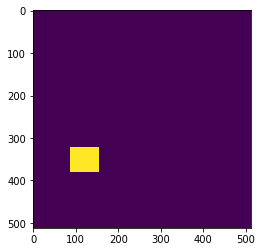

In [53]:
print('bbox_valid :'+str(bbox_valids[0].numpy()))
plt.imshow(bboxes[0][0])

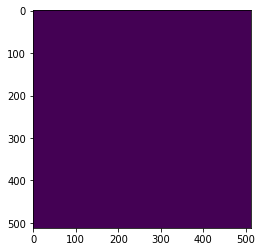

In [54]:
plt.imshow(bboxes[0][1])

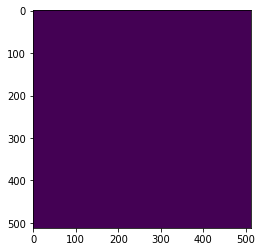

In [55]:
plt.imshow(bboxes[0][2])

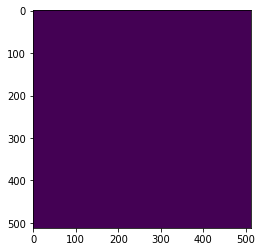

In [56]:
plt.imshow(bboxes[0][3])